In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading target
air = pd.read_csv('./air_quality/clean_air.csv')
air

,magnitud,time_range,mean
0,1,2013-01-01,7.362202
1,1,2013-01-16,5.173782
2,1,2013-01-31,6.855948
3,1,2013-02-15,6.101359
4,1,2013-03-02,4.555366
...,...,...,...
2299,44,2019-10-27,0.114512
2300,44,2019-11-11,0.095403
2301,44,2019-11-26,0.091150
2302,44,2019-12-11,0.073052


In [3]:
# reading circulating proportions
acc = pd.read_csv('./accidentes/clean_accidents.csv')
acc.sort_values(by='time_range')

,time_range,autobus_A,autobus_B,camion_A,camion_B,ciclomotor_A,ciclomotor_B,furgoneta_A,furgoneta_B,motocicleta_A,motocicleta_B,taxi_A,taxi_B,turismo_A,turismo_B
0,2013-01-01,0.011827,0.078785,0.000000,0.000000,0.002439,0.0,0.048937,0.166047,0.075378,0.002713,0.079218,0.000000,0.782200,0.752455
1,2013-01-16,0.017663,0.142478,0.019685,0.013783,0.004371,0.0,0.064656,0.050048,0.071103,0.001636,0.122865,0.051983,0.699657,0.740072
2,2013-01-31,0.013101,0.000000,0.025309,0.022581,0.004539,0.0,0.059634,0.163989,0.087020,0.004689,0.114085,0.085165,0.696311,0.723576
3,2013-02-15,0.012305,0.000000,0.024310,0.115102,0.005260,0.0,0.023143,0.111456,0.062290,0.006829,0.101152,0.028941,0.771541,0.737671
4,2013-03-02,0.012537,0.000000,0.010091,0.000000,0.004137,0.0,0.056199,0.022189,0.059578,0.002175,0.129463,0.023047,0.727996,0.952589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-10-27,0.018342,0.032297,0.027066,0.009373,0.002522,0.0,0.048489,0.102104,0.068365,0.003893,0.000000,0.000000,0.835216,0.852333
167,2019-11-11,0.032794,0.043122,0.042639,0.025029,0.004994,0.0,0.064370,0.098458,0.050774,0.004269,0.000000,0.000000,0.804429,0.829121
168,2019-11-26,0.020549,0.000000,0.035442,0.070192,0.004117,0.0,0.056686,0.077236,0.064992,0.001514,0.000000,0.000000,0.818215,0.851058
169,2019-12-11,0.011339,0.061633,0.038790,0.011924,0.003040,0.0,0.064517,0.072165,0.051986,0.002299,0.000000,0.000000,0.830329,0.851979


In [4]:
# reading traffic flow
flow = pd.read_csv('./traffic_flux/clean_flow.csv')
flow

,time_range,i_a,i_b,c_a,c_b
0,2013-01-01,442.853860,1273.953168,19.480309,19.035396
1,2013-01-16,471.284904,1398.558473,20.490961,21.365628
2,2013-01-31,484.401443,1426.810268,9.943076,21.982869
3,2013-02-15,450.632878,1363.748618,-46.937710,14.447603
4,2013-03-02,460.375634,1395.568157,7.510698,20.785309
...,...,...,...,...,...
166,2019-10-27,412.680069,1246.107304,20.669958,26.423670
167,2019-11-11,437.872429,1288.917360,21.941238,27.440334
168,2019-11-26,409.747544,1219.741258,20.623928,25.986988
169,2019-12-11,430.633538,1276.067310,21.554419,27.106701


In [5]:
flow_i = pd.merge(left = flow , right = acc, how = 'inner', left_on = 'time_range', right_on = 'time_range')
# we now compute the individual flows as j_i = J * proportion
As = ['autobus_A','camion_A','ciclomotor_A','furgoneta_A','motocicleta_A','taxi_A','turismo_A'] 
Bs = ['autobus_B','camion_B','ciclomotor_B','furgoneta_B', 'motocicleta_B','taxi_B','turismo_B']

for vehicle in As:
    flow_i[vehicle] = flow_i[vehicle]*flow_i['i_a']
    
for vehicle in Bs:
    flow_i[vehicle] = flow_i[vehicle]*flow_i['i_b']

In [6]:
# We drop the sum of all intensities: i_a and i_b since they're linearly dependant with the sum of all the flow columns A or B
flow_i = flow_i[['time_range','c_a', 'c_b', 'autobus_A', 'autobus_B',
       'camion_A', 'camion_B', 'ciclomotor_A', 'ciclomotor_B', 'furgoneta_A',
       'furgoneta_B', 'motocicleta_A', 'motocicleta_B', 'taxi_A', 'taxi_B',
       'turismo_A', 'turismo_B']]
flow_i

,time_range,c_a,c_b,autobus_A,autobus_B,camion_A,camion_B,ciclomotor_A,ciclomotor_B,furgoneta_A,furgoneta_B,motocicleta_A,motocicleta_B,taxi_A,taxi_B,turismo_A,turismo_B
0,2013-01-01,19.480309,19.035396,5.237418,100.367961,0.000000,0.000000,1.080101,0.0,21.672064,211.535758,33.381611,3.456468,35.082167,0.000000,346.400499,958.592982
1,2013-01-16,20.490961,21.365628,8.324389,199.264011,9.277343,19.275986,2.060065,0.0,30.471221,69.994886,33.509660,2.287415,57.904447,72.701610,329.737780,1035.034564
2,2013-01-31,9.943076,21.982869,6.346337,0.000000,12.259605,32.218242,2.198769,0.0,28.886759,233.981509,42.152636,6.690650,55.263149,121.514823,337.294188,1032.405045
3,2013-02-15,-46.937710,14.447603,5.544831,0.000000,10.954726,156.970738,2.370161,0.0,10.429144,151.997741,28.069855,9.313590,45.582546,39.468885,347.681615,1005.997665
4,2013-03-02,7.510698,20.785309,5.771611,0.000000,4.645572,0.000000,1.904427,0.0,25.872726,30.966144,27.428444,3.035897,59.601434,32.163615,335.151419,1329.402501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-10-27,20.669958,26.423670,7.569241,40.245725,11.169555,11.679621,1.040659,0.0,20.010627,127.232984,28.212805,4.850932,0.000000,0.000000,344.677182,1062.098042
167,2019-11-11,21.941238,27.440334,14.359571,55.580974,18.670654,32.260058,2.186838,0.0,28.185881,126.904480,22.232372,5.503024,0.000000,0.000000,352.237113,1068.668823
168,2019-11-26,20.623928,25.986988,8.419702,0.000000,14.522187,85.615474,1.686766,0.0,23.226751,94.208053,26.630482,1.847217,0.000000,0.000000,335.261657,1038.070514
169,2019-12-11,21.554419,27.106701,4.883071,78.647359,16.704138,15.216048,1.309133,0.0,27.782975,92.087425,22.386802,2.934159,0.000000,0.000000,357.567420,1087.182319


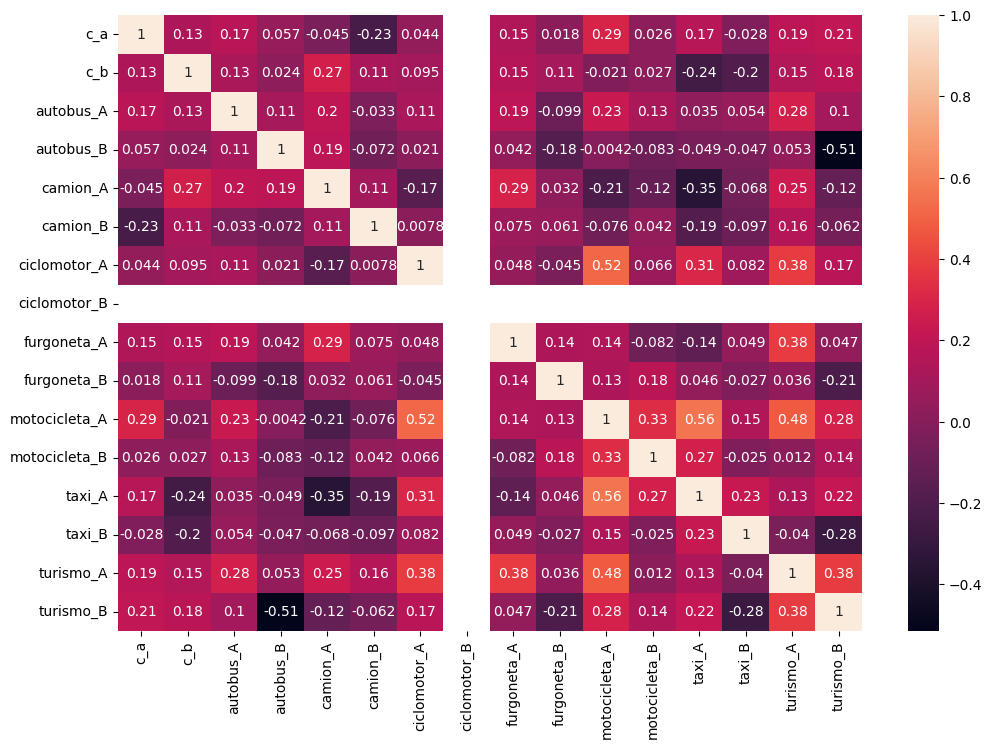

In [7]:
# We see that we have no duplicates in our data because there're no huge correlations. However
# we have to drop "ciclomotor B" because as we see (and we know) ciclomotors are not allowed to 
# drive through the M30, so it's logical that we get a constant value of 0 and so the correlation is not computed
plt.figure(figsize=(12,8))
sns.heatmap(flow_i.corr(numeric_only=True), annot=True)
plt.show()

In [8]:
flow_i = flow_i[['time_range','c_a', 'c_b', 'autobus_A', 'autobus_B',
       'camion_A', 'camion_B', 'ciclomotor_A', 'furgoneta_A',
       'furgoneta_B', 'motocicleta_A', 'motocicleta_B', 'taxi_A', 'taxi_B',
       'turismo_A', 'turismo_B']]

In [9]:
flow_i

,time_range,c_a,c_b,autobus_A,autobus_B,camion_A,camion_B,ciclomotor_A,furgoneta_A,furgoneta_B,motocicleta_A,motocicleta_B,taxi_A,taxi_B,turismo_A,turismo_B
0,2013-01-01,19.480309,19.035396,5.237418,100.367961,0.000000,0.000000,1.080101,21.672064,211.535758,33.381611,3.456468,35.082167,0.000000,346.400499,958.592982
1,2013-01-16,20.490961,21.365628,8.324389,199.264011,9.277343,19.275986,2.060065,30.471221,69.994886,33.509660,2.287415,57.904447,72.701610,329.737780,1035.034564
2,2013-01-31,9.943076,21.982869,6.346337,0.000000,12.259605,32.218242,2.198769,28.886759,233.981509,42.152636,6.690650,55.263149,121.514823,337.294188,1032.405045
3,2013-02-15,-46.937710,14.447603,5.544831,0.000000,10.954726,156.970738,2.370161,10.429144,151.997741,28.069855,9.313590,45.582546,39.468885,347.681615,1005.997665
4,2013-03-02,7.510698,20.785309,5.771611,0.000000,4.645572,0.000000,1.904427,25.872726,30.966144,27.428444,3.035897,59.601434,32.163615,335.151419,1329.402501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-10-27,20.669958,26.423670,7.569241,40.245725,11.169555,11.679621,1.040659,20.010627,127.232984,28.212805,4.850932,0.000000,0.000000,344.677182,1062.098042
167,2019-11-11,21.941238,27.440334,14.359571,55.580974,18.670654,32.260058,2.186838,28.185881,126.904480,22.232372,5.503024,0.000000,0.000000,352.237113,1068.668823
168,2019-11-26,20.623928,25.986988,8.419702,0.000000,14.522187,85.615474,1.686766,23.226751,94.208053,26.630482,1.847217,0.000000,0.000000,335.261657,1038.070514
169,2019-12-11,21.554419,27.106701,4.883071,78.647359,16.704138,15.216048,1.309133,27.782975,92.087425,22.386802,2.934159,0.000000,0.000000,357.567420,1087.182319


# MODELS 

In [16]:
air_so2 = air[air['magnitud']==1][['time_range','mean']]
air_co = air[air['magnitud']==6][['time_range','mean']]
air_pm25 = air[air['magnitud']==9][['time_range','mean']]
air_pm10 = air[air['magnitud']==10][['time_range','mean']]
air_nox = air[air['magnitud']==12][['time_range','mean']]
air_ozo =  air[air['magnitud']==14][['time_range','mean']]
air_benzo = air[air['magnitud']==30][['time_range','mean']]
air_hc = air[air['magnitud']==42][['time_range','mean']]

In [17]:
air_so2 = pd.merge(left = flow_i , right = air_so2, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_co = pd.merge(left = flow_i , right = air_co, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_pm25 = pd.merge(left = flow_i , right = air_pm25, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_pm10 = pd.merge(left = flow_i , right = air_pm10, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_nox = pd.merge(left = flow_i , right = air_nox, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_ozo = pd.merge(left = flow_i , right = air_ozo, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_benzo = pd.merge(left = flow_i , right = air_benzo, how = 'inner', left_on = 'time_range', right_on = 'time_range')
air_hc = pd.merge(left = flow_i , right = air_hc, how = 'inner', left_on = 'time_range', right_on = 'time_range')

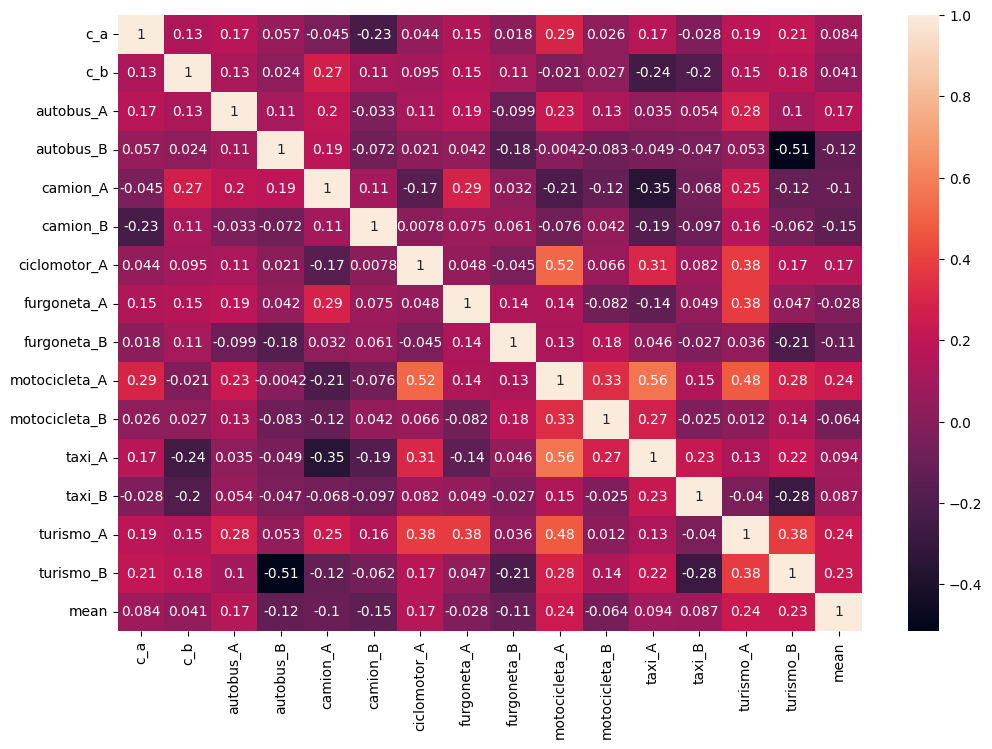

In [45]:
# We use this matrix to see which vehicles affect each particle
plt.figure(figsize=(12,8))
sns.heatmap(air_co.corr(numeric_only=True), annot=True)
plt.show()

In [59]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [117]:
# We check the coefficients of regression independently variable by variable, because we want to know the
# individual impact of each variable and we are not trying to predict the air quality (we did this one by one
# and manually wrote the results to a csv and printed it on tableau)
data = air_co
X = data[['taxi_B']]
#X = data.drop(['mean','time_range'],axis=1)
y = data['mean']
lm = linear_model.LinearRegression()
lm.fit(X,y)
lm.coef_

# motocicleta_A, ttaxi_A, taxi _B 

array([0.00019382])

In [22]:
air_co.to_csv("./to_tableau/air_co.csv")
air_so2.to_csv("./to_tableau/air_so2.csv")
air_co.to_csv("./to_tableau/air_co.csv")
air_pm25.to_csv("./to_tableau/air_pm25.csv")
air_pm10.to_csv("./to_tableau/air_pm10.csv")
air_nox.to_csv("./to_tableau/air_nox.csv")
air_ozo.to_csv("./to_tableau/air_ozo.csv")
air_benzo.to_csv("./to_tableau/air_benzo.csv")
air_hc.to_csv("./to_tableau/air_hc.csv")